<a href="https://colab.research.google.com/github/Sruthij93/Stock-Prediction/blob/main/PredictStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler



I got the API key from this website: https://www.alphavantage.co/support/#api-key

In [ ]:
api_key="X6OOB61H1CIMONAT"

# American Airlines stock market prices
ticker = "TSLA"

# create JSON file with all the stock market data for AAL from the last 20 years
url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

# **Getting data from Alphavantage:**
Take the data from the URL and store in a CSV file. Convert the JSON object into a dataframe.

In [ ]:
# save data to a file
file_to_save = '/content/drive/MyDrive/stock_market_data-%s.csv'%ticker

#if the data is not already saved, take the data from the url and store it
if not os.path.exists(file_to_save):
    with urllib.request.urlopen(url_string) as url:
        data = json.loads(url.read().decode())
        #extract stock market data
        data = data['Time Series (Daily)']
        df = pd.DataFrame(columns = ['Date', 'Low', 'High', 'Close', 'Open'])

        #iterate through the key-value pairs in the data dictionary
        # k = key = a date in the string format- that needs to be converted to date type
        # v = value = another dictionary where 1. open, 2. high, 3. low, 4. close, 5. volume are keys and they have float values
        for k, v in data.items():
            date = dt.datetime.strptime(k, '%Y-%m-%d')
            data_row = [date.date(), float(v['3. low']), float(v['2. high']), float(v['4. close']), float(v['1. open'])]
            df.loc[-1, :] = data_row
            df.index = df.index + 1
    print("Data saved to : %s"%file_to_save)
    df.to_csv(file_to_save)

else:
    print('File already exists. Loading data from CSV')
    df = pd.read_csv(file_to_save)

File already exists. Loading data from CSV


In [ ]:
# sort the date values in the df
df = df.sort_values('Date')
df.head()
df.shape

(3514, 6)

In [ ]:
df.head(10)

,Unnamed: 0,Date,Low,High,Close,Open
3513,0,2010-06-29,17.54,25.0000,23.89,19.0000
3512,1,2010-06-30,23.30,30.4192,23.83,25.7900
3511,2,2010-07-01,20.27,25.9200,21.96,25.0000
3510,3,2010-07-02,18.71,23.1000,19.20,23.0000
3509,4,2010-07-06,15.83,20.0000,16.11,20.0000
3508,5,2010-07-07,14.98,16.6300,15.80,16.4000
3507,6,2010-07-08,15.57,17.5200,17.46,16.1400
3506,7,2010-07-09,16.55,17.9000,17.40,17.5800
3505,8,2010-07-12,17.00,18.0700,17.05,17.9500
3504,9,2010-07-13,16.90,18.6400,18.14,17.3938


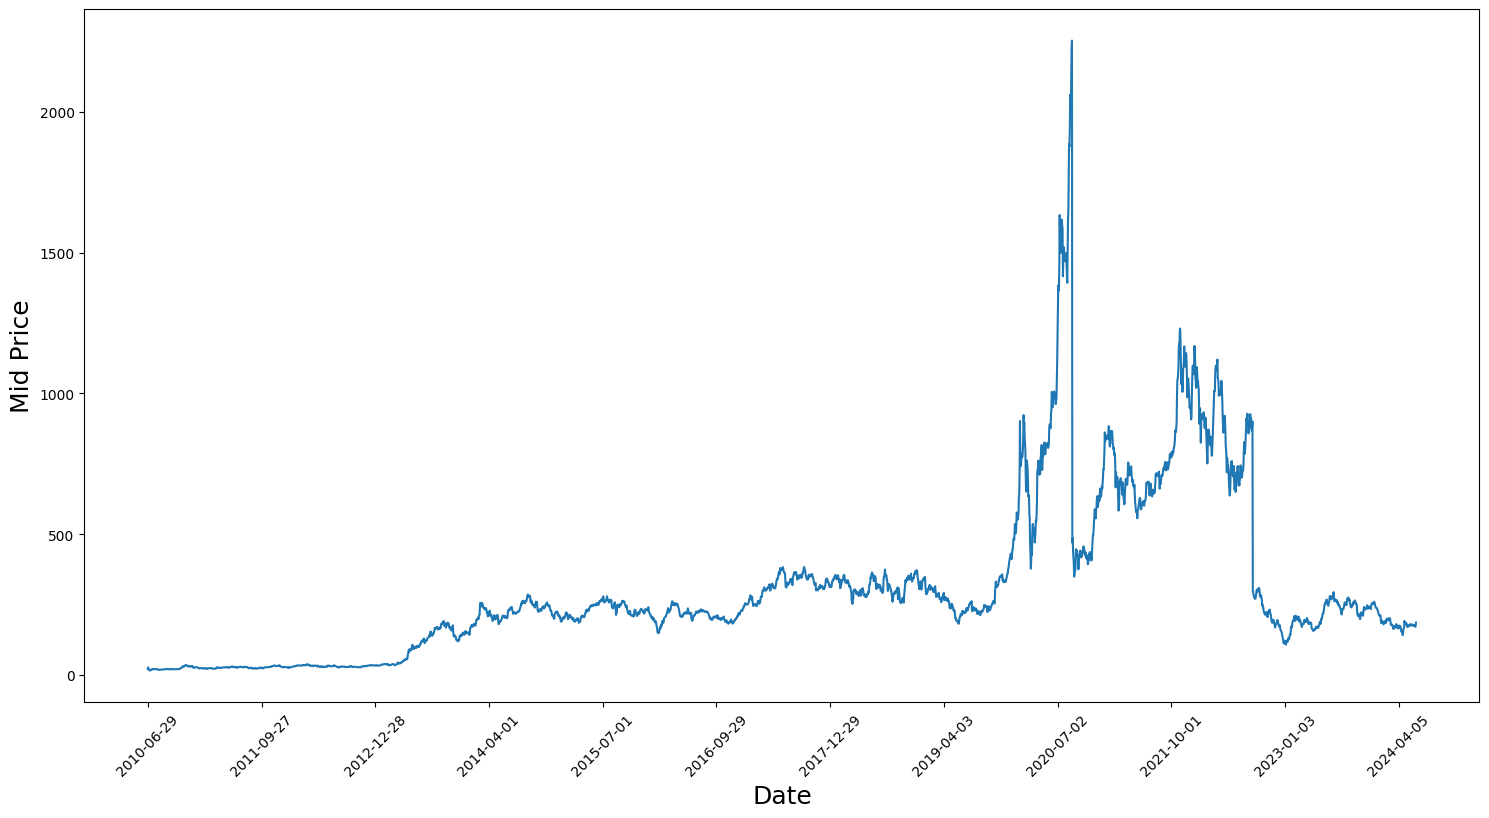

In [ ]:
# Data Visualization
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]), (df['Low'] + df['High']) / 2.0)
plt.xticks(range(0, df.shape[0], 315), df['Date'].iloc[::315], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Mid Price', fontsize = 18)
plt.show()

In [ ]:
df.shape

(3514, 6)

# **Splitting the data into Training and Test sets**

In [ ]:
# First get the mid prices
low_prices = df.loc[:, 'Low'].to_numpy()
high_prices = np.array(df['High'].values)
mid_prices = (high_prices + low_prices) / 2.0



In [ ]:
train_data = mid_prices[:2635]
test_data = mid_prices[2635:]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# normalizing the data using MinMaxScaler
# both the train and test data have to be normalized
# test data will be the normalized the same way since we do not have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1, 1)

In [ ]:
test_data

array([[0.21901848],
       [0.21100175],
       [0.22085847],
       [0.23177764],
       [0.22961167],
       [0.21742721],
       [0.21983223],
       [0.22780549],
       [0.23628343],
       [0.23210603],
       [0.2417793 ],
       [0.2526163 ],
       [0.26513385],
       [0.26473798],
       [0.27996494],
       [0.29664794],
       [0.32820536],
       [0.31255154],
       [0.32155534],
       [0.32086233],
       [0.32310315],
       [0.31760976],
       [0.31857563],
       [0.32190306],
       [0.32198998],
       [0.31703507],
       [0.33215097],
       [0.33897965],
       [0.3347926 ],
       [0.31036573],
       [0.30396925],
       [0.30760336],
       [0.32816204],
       [0.330201  ],
       [0.32024659],
       [0.32358367],
       [0.33053311],
       [0.32305486],
       [0.30936122],
       [0.30616537],
       [0.29917626],
       [0.30177913],
       [0.28932181],
       [0.29152158],
       [0.29229426],
       [0.26924377],
       [0.23396773],
       [0.259

In [ ]:
# Normalize each of windows within train_data of window size
window_size = 800
for i in range(0, 2400, window_size):
  scaler.fit(train_data[i:i+window_size, :])
  train_data[i:i+window_size, :] = scaler.transform(train_data[i:i+window_size, :])

scaler.fit(train_data[i+window_size:, :])
train_data[i+window_size:, :] = scaler.transform(train_data[i+window_size:, :])


In [ ]:
# normalize the test data
test_data = scaler.transform(test_data)

In [ ]:
# reshape both train data and test data
'''The -1 argument in reshape() means that the size of that dimension is inferred from the
length of the array and the remaining dimensions.
This is often used when you want to reshape an array but you don't know the exact size of one
of the dimensions.'''
train_data = train_data.reshape(-1)
test_data = test_data.reshape(-1)

In [ ]:
test_data

array([ 1.50294636e-01,  1.41572461e-01,  1.52296533e-01,  1.64176556e-01,
        1.61819992e-01,  1.48563337e-01,  1.51179989e-01,  1.59854876e-01,
        1.69078838e-01,  1.64533850e-01,  1.75058336e-01,  1.86848957e-01,
        2.00468002e-01,  2.00037306e-01,  2.16604184e-01,  2.34755241e-01,
        2.69089610e-01,  2.52058302e-01,  2.61854408e-01,  2.61100413e-01,
        2.63538418e-01,  2.57561627e-01,  2.58612491e-01,  2.62232719e-01,
        2.62327297e-01,  2.56936362e-01,  2.73382417e-01,  2.80812003e-01,
        2.76256506e-01,  2.49680143e-01,  2.42720793e-01,  2.46674697e-01,
        2.69042479e-01,  2.71260853e-01,  2.60430487e-01,  2.64061223e-01,
        2.71622193e-01,  2.63485875e-01,  2.48587244e-01,  2.45110170e-01,
        2.37506036e-01,  2.40337958e-01,  2.26784434e-01,  2.29177777e-01,
        2.30018443e-01,  2.04939588e-01,  1.66559365e-01,  1.94554420e-01,
        1.86309495e-01,  1.75386652e-01,  1.85327830e-01,  1.85869026e-01,
        1.71759856e-01,  

In [ ]:
# smoothen the training data using Exponential Moving Average Smoothing
EMA = 0.0
gamma = 0.1
for t in range(len(train_data)):
  EMA = gamma * train_data[t] + (1-gamma)*EMA
  train_data[t] = EMA

# for data visualization
all_mid_data = np.concatenate([train_data, test_data], axis = 0)


In [ ]:
all_mid_data


array([ 0.00360559,  0.01053843,  0.01429425, ..., -0.00441394,
        0.00102067,  0.01559259])

# **One Step Ahead Prediction via Averaging**
We can predict future stock prices as an average of the previous stock prices. Doing it for more than one step can produce shockingly bad results.
Here we will evaluate both ways- visually and quantitatively (Mean Square Error).

MSE is done by taking squared error between the true value at one step ahead and the predicted value and averaging it over all the predictions.

In [ ]:
# standard averaging
# take a window of rows from the training data, average them and that will be the prediction.
# to calc MSE, subtract prediction and training data value and square the difference.
window_size_a = 45
N = train_data.size
std_avg_prediction = []
std_avg_x = []
mse_errors = []
for j in range(window_size_a, N):
  if j >= N:
    date = dt.strptime(k, "%Y-%m-%d").date() + dt.timedelta(days = 1)
  else:
    date = df.loc[j, 'Date']

  std_avg_prediction.append(np.mean(train_data[j-window_size_a:j]))
  mse_errors.append((train_data[j]-std_avg_prediction[-1])**2)
  std_avg_x.append(date)

print('MSE error for std averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for std averaging: 0.00427


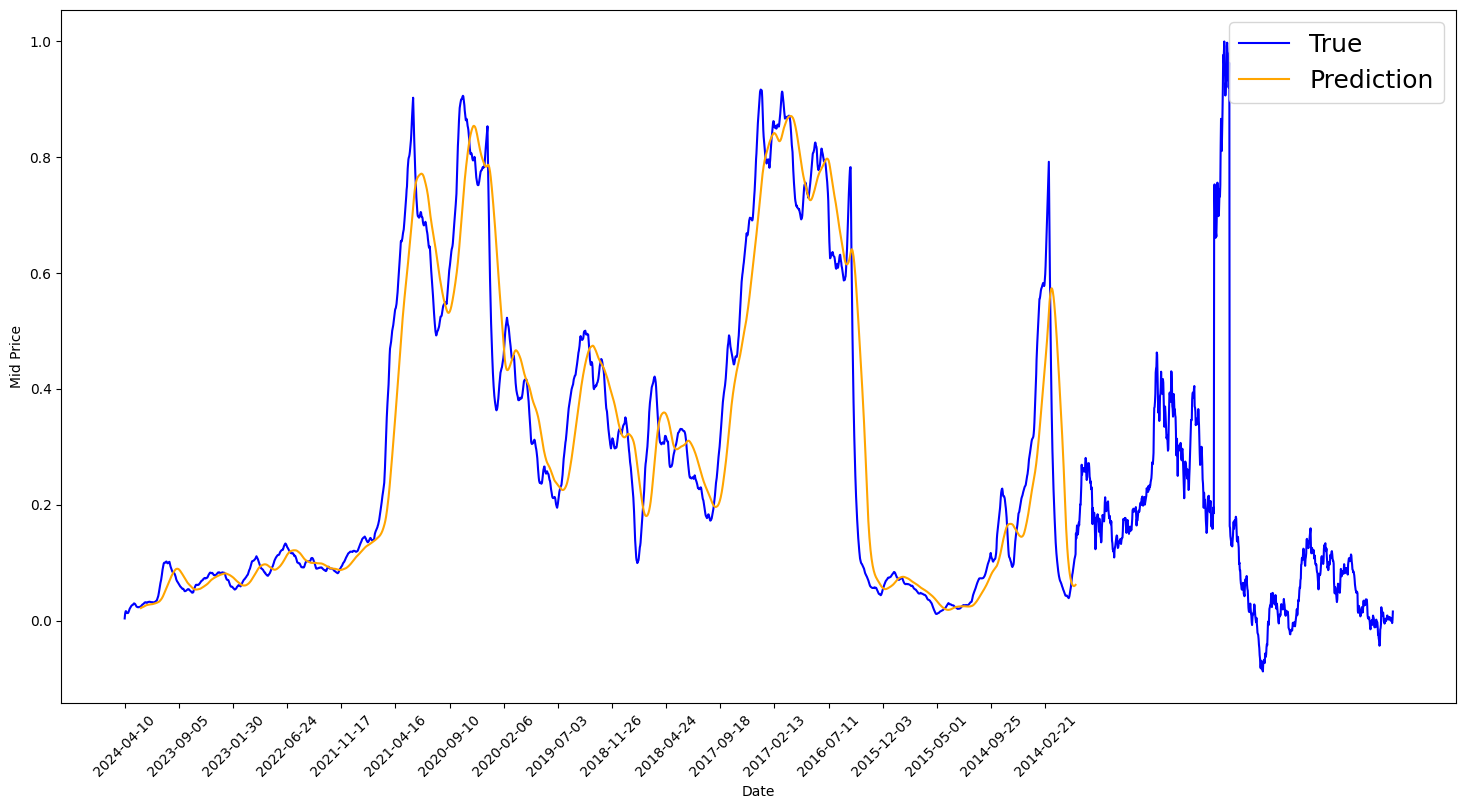

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]), all_mid_data, color = "blue", label = "True")
plt.plot(range(window_size_a, N), std_avg_prediction, color = "orange", label= "Prediction")
plt.xticks(range(0, len(std_avg_x), 150), std_avg_x[::150], rotation = 45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize = 18)
plt.show()

###**One Step Ahead Prediction using Exponential Moving Average**


In [ ]:
window_size_b = 45
N = train_data.size

running_mean = 0
run_avg_prediction = []
run_avg_prediction.append(running_mean)
run_avg_x = []
mse_errors_run = []

decay = 0.5

for k in range(1, N):
  date = df['Date'].loc[k]
  running_mean = running_mean * decay + (1-decay) * train_data[k-1]
  run_avg_prediction.append(running_mean)
  mse_errors_run.append((train_data[k]-run_avg_prediction[-1])**2)
  run_avg_x.append(date)

print("MSE error for EMA averaging: %.5f"%(0.5*np.mean(mse_errors_run)))


MSE error for EMA averaging: 0.00009


In [ ]:
len(run_avg_x)

2634

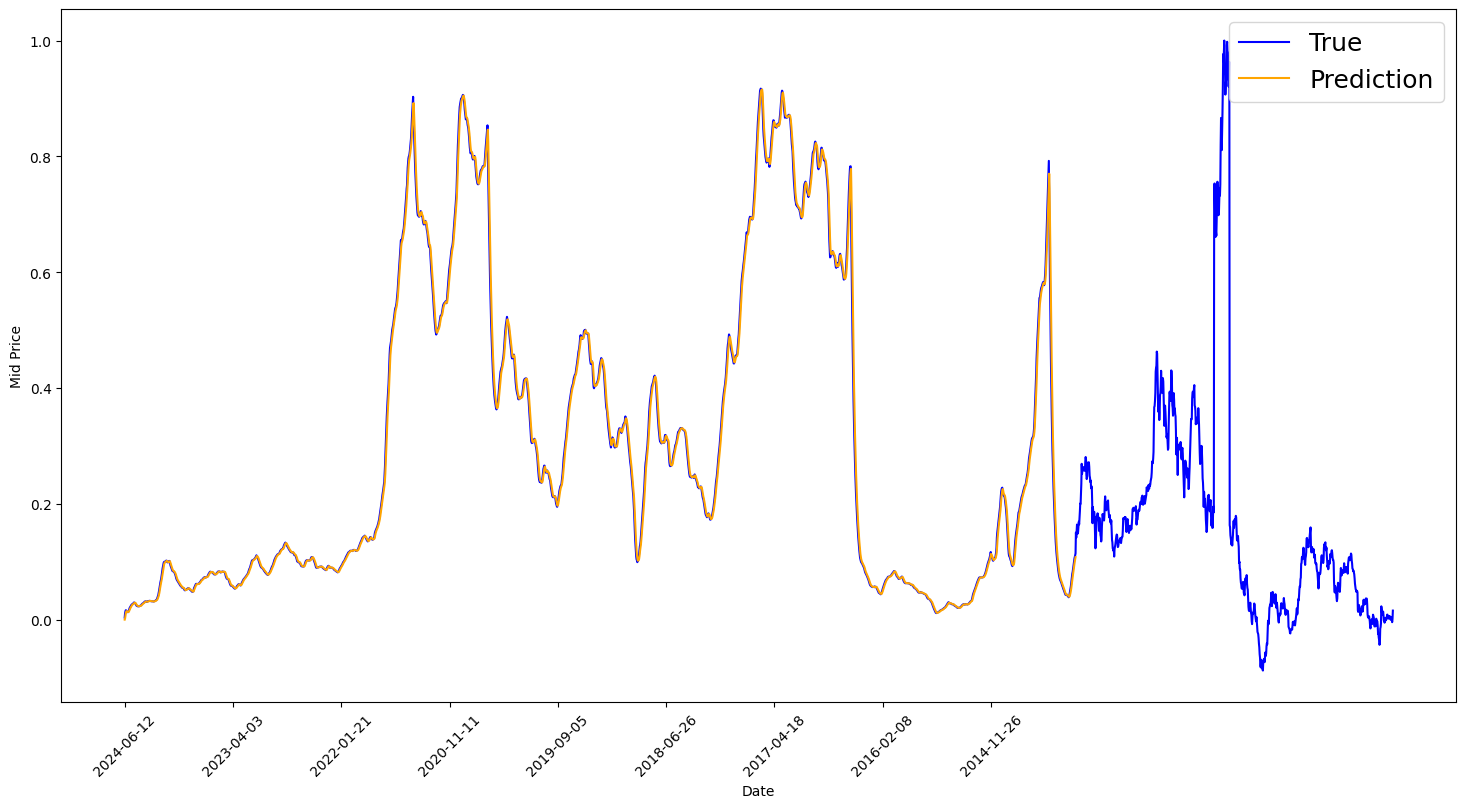

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]), all_mid_data, color = "blue", label = "True")
plt.plot(range(0, N), run_avg_prediction, color = "orange", label = "Prediction")
plt.xticks(range(0, len(run_avg_x), 300), run_avg_x[::300], rotation = 45)
plt.xlabel("Date")
plt.ylabel("Mid Price")
plt.legend(fontsize = 18)
plt.show()


It is a perfect prediction and matches the true values really well, as shown by the low MSE error too. However, we cant do much with just the stock market price for the next day. We need to know if the stock market price will go up or down in the next 30 days. If we use EMA for this then, we will see how bad it is.

Momentum based algorithms can be helpful as they will tell based on past few values whether the future value will be up or down. So if the past few days, the prices have been going down, it will predict the future prices to be going down as well.

###**We will use LSTM** a more complex model
And the equations for calculating each of these entities are as follows.

$i_t = σ(W_{ix}X_t + W_{ih}h_{t-1} + b_i)$
$\tilde{c}_t = \sigma(W_{cx}x_t + W_{ch}h_{t-1} + b_c)$
$f_t = \sigma(W_{fx}x_t + W_{fh}h_{t-1}+b_f)$

$c_t = f_t (c_{t-1} + i_t\tilde{c}_t)$

$o_t = \sigma(W_{ox}x_t + W_{oh}h_{t-1}+b_o)$

$h_t = o_t tanh(c_t)$

In [ ]:
from re import L
# Define a DataGenerator class that will divide the data into batches and segments.
class DataGeneratorSeq(object):
  def __init__(self, prices, batch_size, num_unroll):
    self._prices = prices
    self._batch_size = batch_size
    self._prices_length = len(self._prices) - num_unroll
    self._num_unroll = num_unroll
    self._segments = self._prices_length // self._batch_size
    self._cursor = [offset * self._segments for offset in range(self._batch_size)]

  def next_batch(self):
    batch_data = np.zeros((self._batch_size),  dtype = np.float32)
    batch_label = np.zeros((self._batch_size), dtype = np.float32)

    for b in range(self._batch_size):
      if self._cursor[b] + 1 >=self._prices_length:
        self._cursor[b] = np.random.randint(0, (b+1)*self._segments)

      batch_data[b] = self._prices[self._cursor[b]]
      batch_label[b] = self._prices[self._cursor[b]+np.random.randint(0,5)]

      self._cursor[b] = (self._cursor[b]+1)% self._prices_length

    return batch_data, batch_label

  def unroll_batch(self):
    unroll_data, unroll_label = [], []
    for ui in range(self._num_unroll):
      data, label = self.next_batch()
      unroll_data.append(data)
      unroll_label.append(label)

    return unroll_data, unroll_label


  def reset_indices(self):
    for b in range(self._batch_size):
      self._cursor[b] = np.random.randint(0, min((b+1)*self._segments, self._prices.length-1))

dg = DataGeneratorSeq(train_data, 5, 5)
u_data, u_labels = dg.unroll_batch()

for ui, (dat,lbl) in enumerate(zip(u_data, u_labels)):
  print('\nUnrolled index %d'%ui)
  print('\n\tInputs: ', dat)
  print('\n\tOutput: ', lbl)




Unrolled index 0

	Inputs:  [0.00360559 0.09926361 0.48049292 0.2491847  0.06141313]

	Output:  [0.00360559 0.09715872 0.5096935  0.24328698 0.06465305]

Unrolled index 1

	Inputs:  [0.01053843 0.09715872 0.49090552 0.2507357  0.06302825]

	Output:  [0.01599874 0.08954398 0.49090552 0.24503328 0.06876173]

Unrolled index 2

	Inputs:  [0.01429425 0.09483547 0.4967897  0.24855088 0.06465305]

	Output:  [0.0162296  0.08975696 0.5035714  0.24328698 0.06465305]

Unrolled index 3

	Inputs:  [0.0162296  0.09220024 0.5035714  0.24503328 0.0664544 ]

	Output:  [0.01439887 0.09046191 0.5189408  0.23731285 0.0664544 ]

Unrolled index 4

	Inputs:  [0.01599874 0.09046191 0.5096935  0.24328698 0.06791165]

	Output:  [0.0128768  0.08975696 0.5228672  0.23731285 0.06944904]
